<div style="text-align: center">
<h1>PRODUCTO ACREDITABLE</h1>
    <h2><font color="#004D7F" size=6>Reconocimiento de Lenguaje de Señas</font></h2>
<h1></h1>
<div style="text-align: center">
<font color="#004D7F" size=5>Curso: Inteligencia Artificial</font><br>
    <h1></h1>
<font color="#004D7F" size=5>Docente: Ing. Juan Villegas Cubas</font><br>
    <h1></h1>
    <font color="#004D7F" size=5>Alumno: Walter Caicay Galindo</font><br>
<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Marzo 2023</font><br>

# CARGANDO EL DATASET

In [7]:
#ESTABLECIENDO PARAMETROS
batch_size = 32 #TAMAÑO DEL PAQUETE
width_shape = 100 #ALTO DE LA IMAGEN
height_shape = 100 #ANCHO DE LA IMAGEN
epochs=100 #EPOCAS

In [3]:
#CARGAREMOS EL DATA SET
import pathlib
ruta=pathlib.Path("Imagenes/train")
ruta1=pathlib.Path("Imagenes/test")

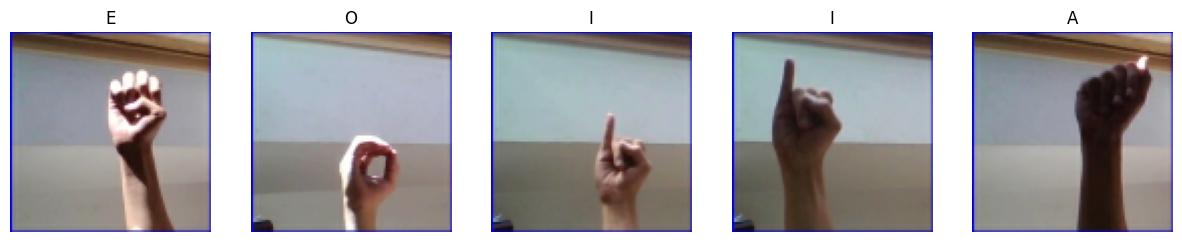

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
for images, labels in train_ds.take(1):
  for i in range(5):
    ax = plt.subplot(1,5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(categorias[labels[i]])
    plt.axis("off")

In [4]:
#DIVIREMOS EL DATA SET EN 5 CATEGORIAS
categorias = ['A','E','I','O','U']

# TRATAMIENTO DE IMAGEN

tipo: <class 'numpy.ndarray'>
tipo dos datos: uint8
altura: 200 largura: 200
numero de dimensiones: 3


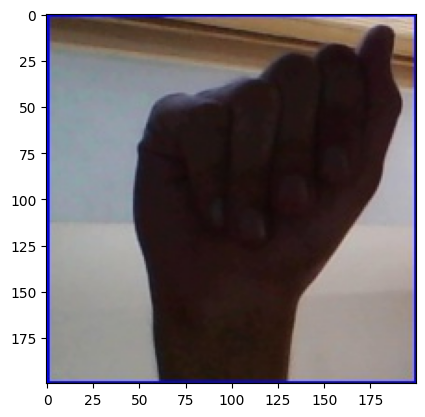

In [4]:
#MOSTRAREMOS UNA IMAGEN CON LA CUAL TRABAJAREMOS Y PASAREMOS A ESCALA DE GRISES
from skimage import io, data
import matplotlib.pyplot as plt
import numpy as np
import os

img = io.imread('Imagenes/train/A/A226.jpg')
altura, largura, x = img.shape
print(f'tipo: {type(img)}')
print(f'tipo dos datos: {img.dtype}')
print(f'altura: {altura} largura: {largura}')
print(f'numero de dimensiones: {img.ndim}')

plt.imshow(img)

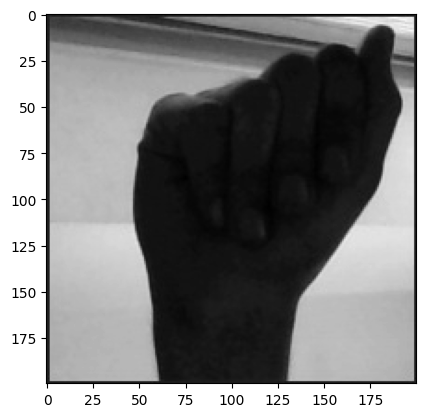

In [5]:
#CONVIRTIENDO UNA IMAGEN EN ESCALA DE COLOR RGB A UNA IMAGEN EN ESCALA DE GRISES
def rgb_to_gray(img):
    nimg = img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.144 #cada número representa rojo, verde y azul respectivamente
    return nimg

gimg = rgb_to_gray(img)
plt.imshow(gimg, cmap='gray') #imshow "gray" garantiza que semuestre en blanco y negro

(-0.5, 199.5, 199.5, -0.5)

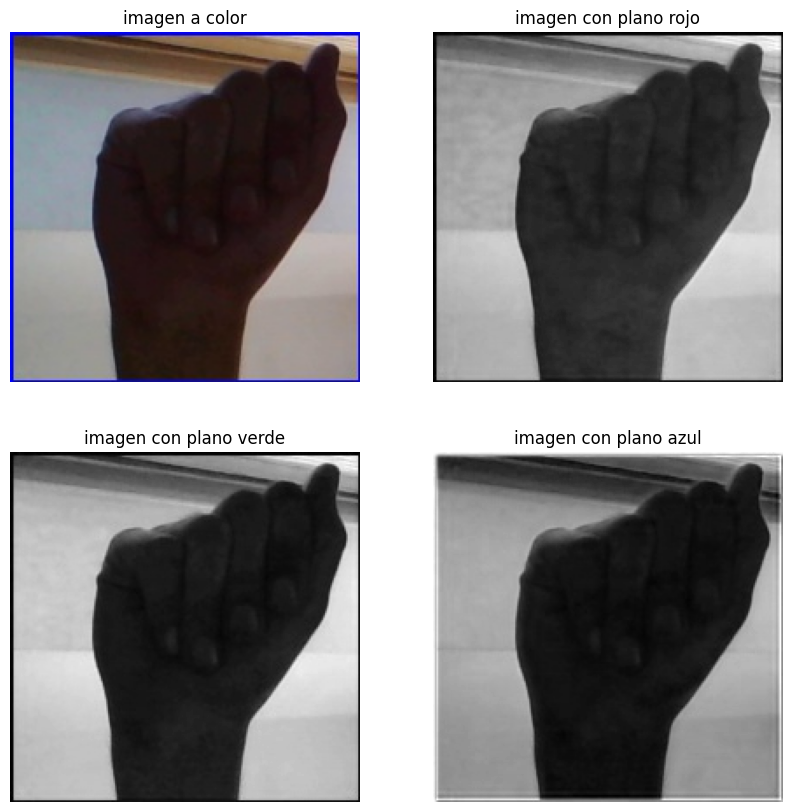

In [6]:
#ARREGLO SUBPLOT DE 2X2
f, ax = plt.subplots(2, 2, figsize = (10,10))
ax[0,0].imshow(img)
ax[0,0].set_title("imagen a color") #SIN MODIFICACIONES
ax[0,0].axis('off')

ax[0,1].imshow(img[:,:,0], cmap='gray')
ax[0,1].set_title("imagen con plano rojo") #INTENSIDAD DE COLOR ROJO
ax[0,1].axis('off')

ax[1,0].imshow(img[:,:,1], cmap='gray')
ax[1,0].set_title("imagen con plano verde") #INTENSIDAD DE COLOR VERDE
ax[1,0].axis('off')

ax[1,1].imshow(img[:,:,2], cmap='gray')
ax[1,1].set_title("imagen con plano azul") #INTENSIDAD DE COLOR AZUL
ax[1,1].axis('off')

In [7]:
import os
import cv2

dataTrain_url = ruta
dataTest_url = ruta1
dataTrain = []
dataTest = []

def create_training_data_train():
    for category in categorias:
        path=os.path.join(dataTrain_url, category)
        class_num=categorias.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(width_shape,height_shape))
                dataTrain.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data_train()

def create_training_data_test():
    for category in categorias:
        path=os.path.join(dataTest_url, category)
        class_num=categorias.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(width_shape,height_shape))
                dataTest.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data_test()

In [8]:
import numpy as np

X_train=[]
y_train=[]
lenofimageTrain = len(dataTrain)

for categories, label in dataTrain:
    X_train.append(categories)
    y_train.append(label)
X_train= np.array(X_train).reshape(lenofimageTrain,-1)

X_test=[]
y_test=[]
lenofimageTest = len(dataTest)
for categories, label in dataTest:
    X_test.append(categories)
    y_test.append(label)
X_test= np.array(X_test).reshape(lenofimageTest,-1)

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0
y_train=np.array(y_train)
y_test=np.array(y_test)

# MODELADO DE LOS DATOS

In [10]:
# Evaluacion base
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Spot Check Algorithms
models = []

models.append(('RF', RandomForestClassifier(criterion='gini', n_estimators = 100, random_state = 99)))
models.append(('CART', DecisionTreeClassifier(criterion = 'gini', max_depth= 3, splitter= 'random')))
models.append(('SVM', SVC(C=2.0, kernel='rbf')))

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import cohen_kappa_score
import pandas as pd
num_folds=10
seed=7
results = []
names = []
AcurracyBase = []
KappaBase  = []
DesvBase = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    AcurracyBase.append(cv_results.mean()*100.0)
    DesvBase.append(cv_results.std()*100.0)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    cohen_score=cohen_kappa_score(y_test, predicted)
    KappaBase.append(cohen_score*100.0)

data  = np.zeros((0, len(names)))
Metricas  = pd.DataFrame(data, columns=names)
Metricas.loc['Accuracy_Base']= AcurracyBase
Metricas.loc['Accuracy_Des_Base']= DesvBase
Metricas.loc['Kappa_Base']= KappaBase
Metricas

,RF,CART,SVM
Accuracy_Base,99.822219,84.639697,100.0
Accuracy_Des_Base,0.355567,10.083187,0.0
Kappa_Base,71.250000,54.250000,45.0


<pre>Se observa que los algoritmos cuentan con acurracys elevados, a excepción de Desicion Tree ("CART"), por lo tanto no se considera la optimización.</pre>

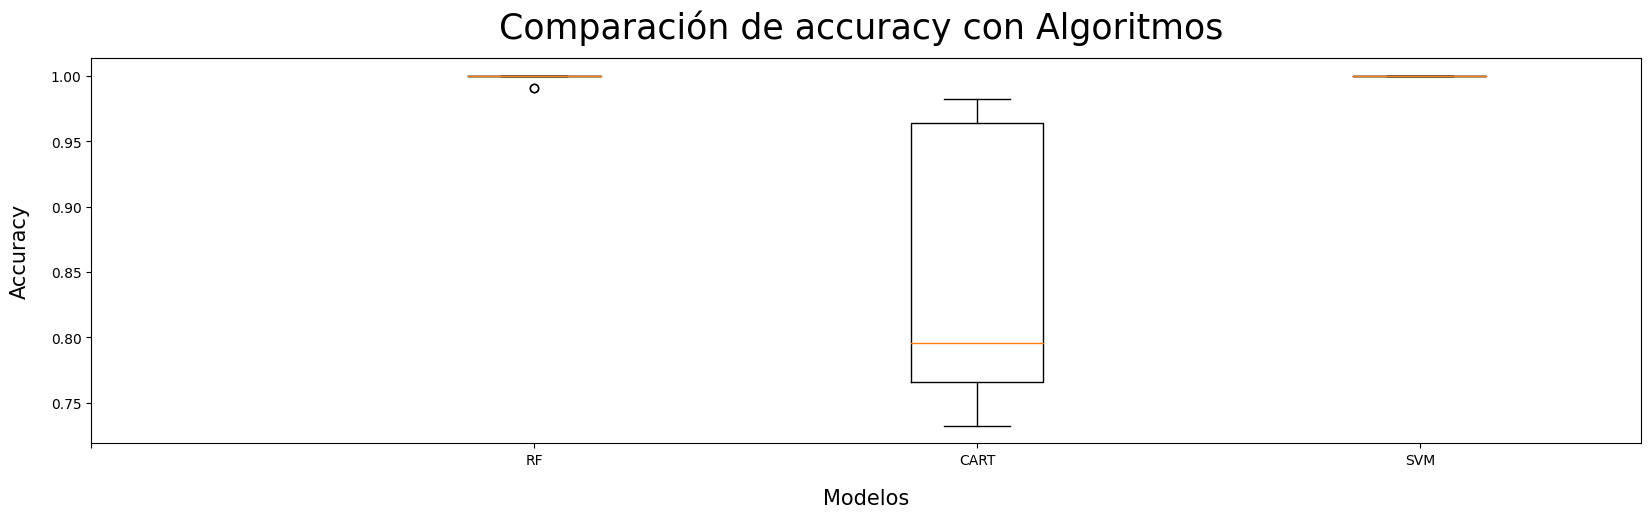

In [23]:
#Visualización de los resultados con accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.boxplot(results)
plt.xticks(range(len(names)+1),([" "] + names))
plt.xlabel("Modelos",fontdict={"fontsize":15},labelpad=15.0)
plt.ylabel("Accuracy",fontdict={"fontsize":15},labelpad=15.0)
plt.title("Comparación de accuracy con Algoritmos ",fontdict={"fontsize":25},pad=15.0)
plt.show()

# RED NEURONAL CONVOLUCIONAL

In [15]:
import tensorflow as tf 
#INDICAMOS LA INFORMACIÓN DE ENTRENAMIENTO
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  ruta,
  seed=7,
  image_size=(height_shape, width_shape),
  batch_size=batch_size,
)

#INDICAMOS LA INFORMACIÓN DE TESTEO
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  ruta1,
  seed=7,
  image_size=(height_shape, width_shape),
  batch_size=batch_size)

Found 1125 files belonging to 5 classes.
Found 500 files belonging to 5 classes.


In [17]:
#DEFINICIÓN DEL MODELO CNN
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Input, Dense, Activation
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras import layers 

num_classes = len(categorias)
model_cnn100 = tf.keras.Sequential([

    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height_shape, width_shape,3)),
    
    tf.keras.layers.Conv2D(16,3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    
    tf.keras.layers.Conv2D(32,3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    
    tf.keras.layers.Conv2D(64,3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    
    tf.keras.layers.Conv2D(128,3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128,3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    
    tf.keras.layers.Conv2D(256,3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256,3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_cnn100.compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     metrics=['accuracy'])

In [19]:
#PONDREMOS A ENTRENAR EL MODELO SEGÚN LAS ÉPOCAS CORRESPONDIENTES (EPOCH=100)
history100 = model_cnn100.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100


C:\Users\walter\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


36/36 [==============================] - 6s 131ms/step - loss: 1.4616 - accuracy: 0.3262 - val_loss: 0.9933 - val_accuracy: 0.4220
Epoch 2/100
36/36 [==============================] - 5s 133ms/step - loss: 0.8807 - accuracy: 0.5849 - val_loss: 0.7706 - val_accuracy: 0.6700
Epoch 3/100
36/36 [==============================] - 5s 134ms/step - loss: 0.1706 - accuracy: 0.9360 - val_loss: 2.2742 - val_accuracy: 0.5680
Epoch 4/100
36/36 [==============================] - 5s 133ms/step - loss: 0.1077 - accuracy: 0.9609 - val_loss: 0.3213 - val_accuracy: 0.9060
Epoch 5/100
36/36 [==============================] - 5s 132ms/step - loss: 0.0255 - accuracy: 0.9929 - val_loss: 0.9347 - val_accuracy: 0.8720
Epoch 6/100
36/36 [==============================] - 5s 133ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.9056 - val_accuracy: 0.8920
Epoch 7/100
36/36 [==============================] - 5s 133ms/step - loss: 0.0259 - accuracy: 0.9911 - val_loss: 0.5968 - val_accuracy: 0.8920
Epoch 8/100

<Figure size 640x480 with 0 Axes>

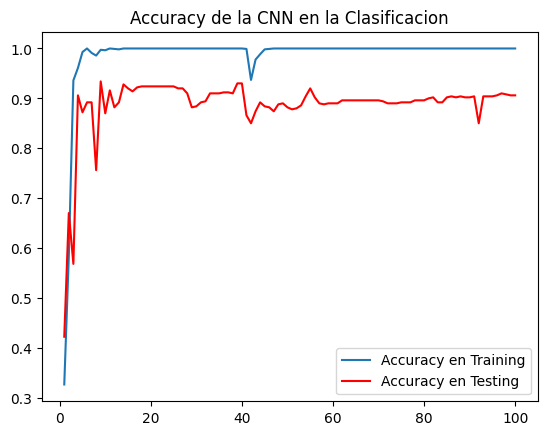

<Figure size 640x480 with 0 Axes>

In [21]:
#NOS MOSTRARÁ GRAFICAS COMPARANDO EL ACCURACY DE ENTRENAMIENTO Y TESTEO
import matplotlib.pyplot as plt

acc = history100.history['accuracy']
val_acc = history100.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Accuracy en Training')
plt.plot(epochs, val_acc, label='Accuracy en Testing', color='red')
plt.title('Accuracy de la CNN en la Clasificacion')
plt.legend()
plt.figure()

In [20]:
evaluation_cnn100 = model_cnn100.evaluate(val_ds)
evaluation_cnn100

16/16 [==============================] - 0s 22ms/step - loss: 1.8189 - accuracy: 0.9060


[1.8189153671264648, 0.906000018119812]

<pre>Vemos que el accuracy es del 90%</pre>

In [22]:
#Optimizando CNN
def MiModeloCNN(batch,tamano,epocas,kernel,optimizador,dropout):
  
  modelo_cnn = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(tamano, tamano, 3)),
  layers.Conv2D(batch/2, (kernel,kernel), padding='same', activation='relu'),
  layers.MaxPooling2D(2),
  layers.Dropout(dropout),
      
  layers.Conv2D(batch,(kernel,kernel), padding='same', activation='relu'),
  layers.MaxPooling2D(2),
  layers.Dropout(dropout),
  
  layers.Flatten(),
  layers.Dense(batch*4, activation='relu'),
  layers.Dropout(dropout),
  layers.Dense(2)
  ])
  return modelo_cnn

In [24]:
#GUARDAMOS EL MODELO
modelo = model_cnn100.save('./Modelos/cnn.h5')

# EVALUACIÓN DEL MODELO

Found 500 images belonging to 5 classes.


C:\Users\walter\AppData\Local\Temp\ipykernel_2928\3629409388.py:25: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicciones = custom_Model.predict_generator(generator=test_generator)


              precision    recall  f1-score   support

           0     0.7778    0.7700    0.7739       100
           1     0.7723    0.7800    0.7761       100
           2     1.0000    1.0000    1.0000       100
           3     1.0000    1.0000    1.0000       100
           4     1.0000    1.0000    1.0000       100

    accuracy                         0.9100       500
   macro avg     0.9100    0.9100    0.9100       500
weighted avg     0.9100    0.9100    0.9100       500



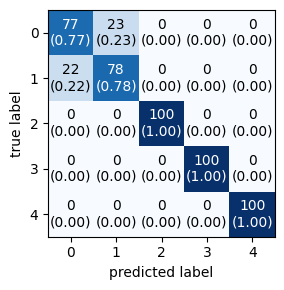

In [10]:
import pathlib
from keras.preprocessing.image import ImageDataGenerator
#from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, brier_score_loss
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

ruta_pred = pathlib.Path("Imagenes/test")

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    ruta_pred,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)

custom_Model= load_model("./Modelos/cnn.h5")

predicciones = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predicciones, axis=1)
y_real = test_generator.classes

mc = confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=mc, figsize=(3,3),show_normed=True)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4 ))

<pre>Se observa que el accurracy obtenido en la evaluación del modelo es de un 91%</pre>

# ANÁLISIS DEL OVERFITTING

<pre>El overfitting (sobreajuste) ocurre cuando un modelo de aprendizaje automático se ajusta demasiado a los datos de entrenamiento y pierde su capacidad para generalizar y realizar predicciones precisas en datos nuevos.</pre>
<pre>Puede ser causado por varios factores:</pre>
     *Modelos Complejos
     *Datos Insuficientes
     *Entrenamiento Excesivo

In [28]:
#CARGAMOS EL DATASET PARA TESTEAR
import tensorflow as tf 
ruta_test=ruta1
data_test = tf.keras.preprocessing.image_dataset_from_directory(
  ruta_test,
  seed=7,
  image_size=(height_shape, width_shape),
  batch_size=batch_size)

Found 500 files belonging to 5 classes.


1/1 [==============================] - 0s 15ms/step


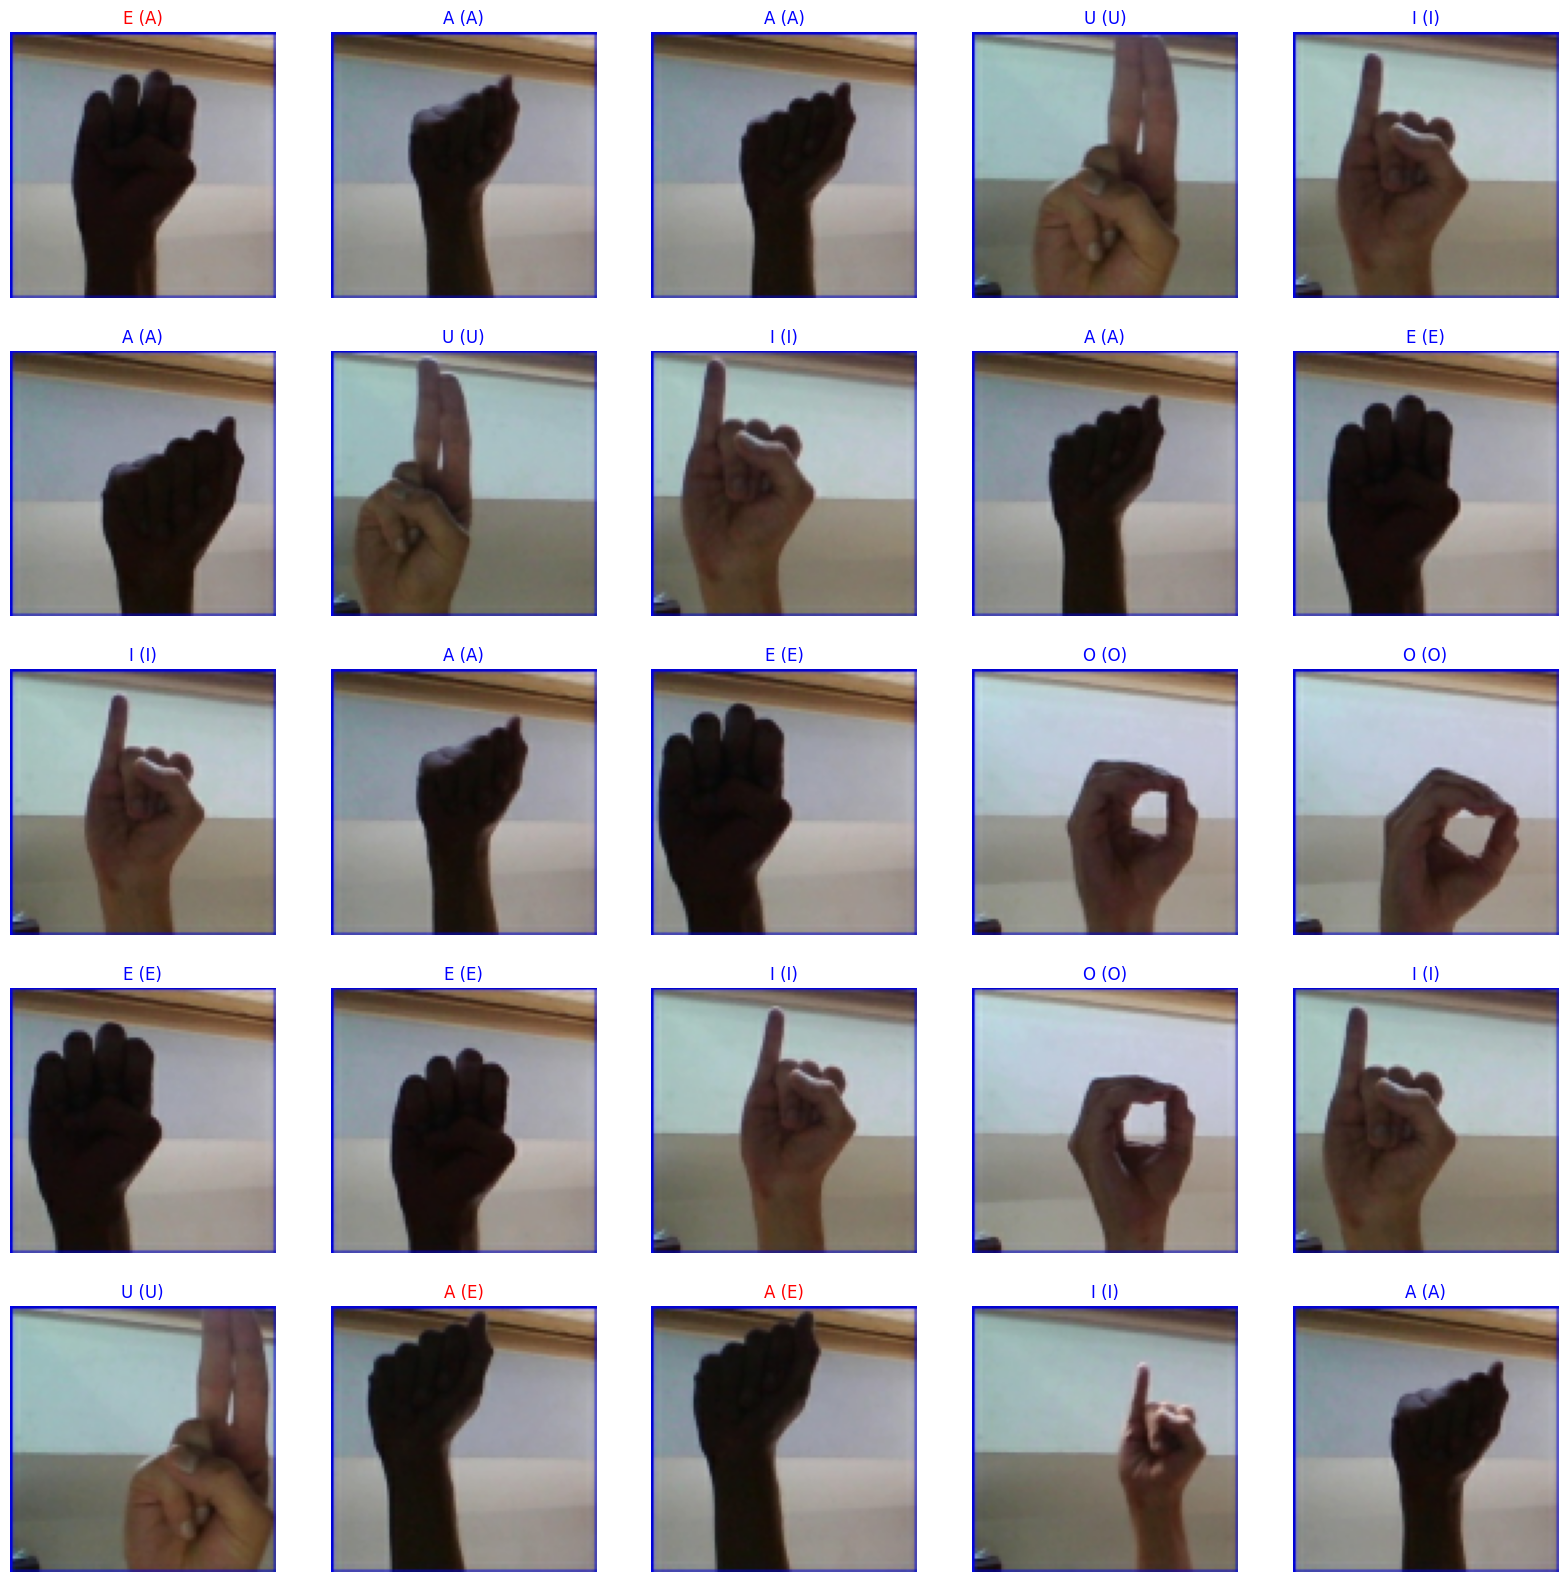

In [29]:

import matplotlib.pyplot as plt
import numpy
modelo_test=custom_Model
plt.figure(figsize=(20, 20))
for images, labels in data_test.take(2):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        img_array = tf.keras.preprocessing.image.img_to_array(images[i])
        img_array = tf.expand_dims(img_array, 0) 
        predictions = modelo_test.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        plt.imshow(images[i].numpy().astype("uint8"))
        if categorias[labels[i]] == categorias[np.argmax(score)]:
            color = 'blue'
        else:
            color = 'red'
        plt.title('{} ({})'.format(categorias[labels[i]],categorias[np.argmax(score)]),color = color )
        plt.axis("off")

<pre>Podemos ver: </pre>
    *Podemos ver que el resultado de similitud es de 91%, ya que 27 imagenes de 30 coinciden.
    *Coincide con el accuracy de la CNN.

# CONCLUSIONES

<pre>- En la fase de modelado de datos se tomaron en cuenta los 2 algoritmos de machine learning más utilizado en el estado de arte que se revisó previamente(RF,SVM). Se comprobó que dichos algoritmos brindan un accurracy elevado para el procesamiento de imágenes. Además también se consideró el algoritmo Decision Tree (CART), se observa que este algoritmo llegó a un 84% de accurracy.</pre>

<pre>- Adicionalmente a los algoritmos establecidos, se utilizó un algoritmo de deep learning, llamado Redes Neuronales Convolucionales(CNN). Este algoritmo es el que presenta el mayor accurracy, siendo este de un 91%.</pre>